<a href="https://colab.research.google.com/github/bhuwan1998/Neural_networks/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt




In [3]:
from keras.datasets import mnist


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [9]:
print("type x_train : ", type(x_train))
print("type x_test : ", type(x_test))
print("type y_train: ", type(y_train))
print("type y_test: ", type(y_test))

type x_train :  <class 'numpy.ndarray'>
type x_test :  <class 'numpy.ndarray'>
type y_train:  <class 'numpy.ndarray'>
type y_test:  <class 'numpy.ndarray'>


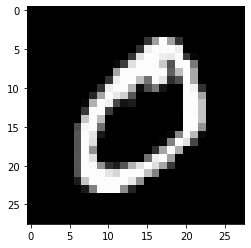

In [24]:
index = 1
plt.imshow(x_train[index], cmap = 'gray')

In [14]:
print("x_train: ", x_train.shape)

x_train:  (60000, 28, 28)


In [15]:
print("image label : ", y_train[index])

image label :  9


In [27]:
#converting it to 3x3 matrices 
classification = [0,1,2,3,4,5,6,7,8,9]
print("image label: ", classification[y_train[index]])

image label:  0


In [30]:
#reshaping the data to fit the model 
# number of images, pixels for the image, last number 1 signifies that the image is grayscale 

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [31]:
#one hot encode the values of y
#for example if the image shows a number of 5 
# then 1 in the array of 10 numbers will be at location 6 (starts from 0 )
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [41]:
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, activation='relu', input_shape = (28,28,1)))

model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 4)


Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 177s 3ms/step - loss: 0.2036 - accuracy: 0.9527 - val_loss: 0.0885 - val_accuracy: 0.9726
Epoch 2/4
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.0782 - val_accuracy: 0.9773
Epoch 3/4
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.1069 - val_accuracy: 0.9726
Epoch 4/4
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.1306 - val_accuracy: 0.9666


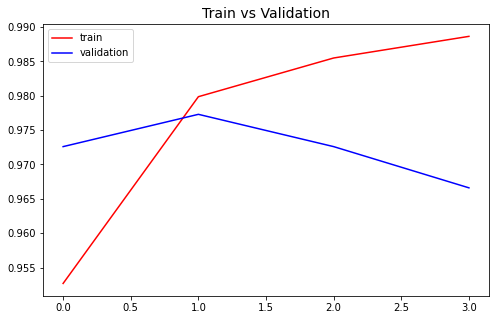

In [50]:
figure = plt.figure(figsize = (8,5))
plt.plot(hist.history['accuracy'], c = 'red', label = 'train')
plt.plot(hist.history['val_accuracy'], c = 'blue', label = 'validation')
plt.title("Train vs Validation", size = 14)
plt.legend()


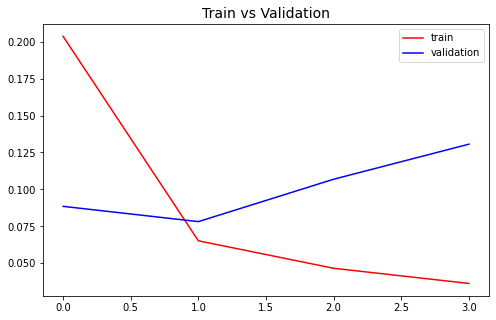

In [53]:
figure = plt.figure(figsize = (8,5))
plt.plot(hist.history['loss'], c = 'red', label = 'train')
plt.plot(hist.history['val_loss'], c = 'blue', label = 'validation')
plt.title("Train vs Validation", size = 14)
plt.legend()